<a href="https://colab.research.google.com/github/nguyetmle/voting-distortion/blob/main/Voting_Distortion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [352]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib as mpl
import pandas as pd
import numpy as np
# from matplotlib.cm import get_cmap


# mpl.rcParams.update(mpl.rcParamsDefault) #to reset style
style.use('ggplot')
style.use('tableau-colorblind10')
style.use('seaborn-v0_8-paper')
style.available



['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [253]:
#read the output file
df = pd.read_csv("output1D.csv")
df.head()



,index,n,m,Dimension,Distribution,OPT,Plurality,Plurality Distortion,Copeland,Copeland Distortion,STV,STV Distortion,Borda,Borda Distortion,STAR,STAR Distortion,Plurality Veto,Plurality Veto Distortion
0,0,200,5,1D,normal,Candidate 1,Candidate 1,1.000000,Candidate 1,1.0,Candidate 1,1.0,Candidate 1,1.0,Candidate 1,1.0,Candidate 1,1.000000
1,1,200,5,1D,normal,Candidate 0,Candidate 2,1.004068,Candidate 0,1.0,Candidate 2,1.0040675638805894,Candidate 0,1.0,Candidate 0,1.0,Candidate 2,1.004068
2,2,200,5,1D,normal,Candidate 3,Candidate 3,1.000000,Candidate 3,1.0,Candidate 3,1.0,Candidate 3,1.0,Candidate 3,1.0,Candidate 3,1.000000
3,3,200,5,1D,normal,Candidate 2,Candidate 2,1.000000,Candidate 2,1.0,Candidate 2,1.0,Candidate 2,1.0,Candidate 2,1.0,Candidate 2,1.000000
4,4,200,5,1D,normal,Candidate 4,Candidate 0,1.018156,Candidate 4,1.0,Candidate 0,1.0181561532430627,Candidate 4,1.0,Candidate 0,1.0181561532430627,Candidate 0,1.018156


In [254]:
#make sure all distortion columns are numeric
df.loc[df["STAR Distortion"] == "False", "STAR Distortion"] = np.nan
df.loc[df["STV Distortion"] == "False", "STV Distortion"] = np.nan
df["STAR Distortion"] = pd.to_numeric(df["STAR Distortion"], errors="coerce")
df["STV Distortion"] = pd.to_numeric(df["STV Distortion"], errors="coerce")


In [255]:
df.head()

,index,n,m,Dimension,Distribution,OPT,Plurality,Plurality Distortion,Copeland,Copeland Distortion,STV,STV Distortion,Borda,Borda Distortion,STAR,STAR Distortion,Plurality Veto,Plurality Veto Distortion
0,0,200,5,1D,normal,Candidate 1,Candidate 1,1.000000,Candidate 1,1.0,Candidate 1,1.000000,Candidate 1,1.0,Candidate 1,1.000000,Candidate 1,1.000000
1,1,200,5,1D,normal,Candidate 0,Candidate 2,1.004068,Candidate 0,1.0,Candidate 2,1.004068,Candidate 0,1.0,Candidate 0,1.000000,Candidate 2,1.004068
2,2,200,5,1D,normal,Candidate 3,Candidate 3,1.000000,Candidate 3,1.0,Candidate 3,1.000000,Candidate 3,1.0,Candidate 3,1.000000,Candidate 3,1.000000
3,3,200,5,1D,normal,Candidate 2,Candidate 2,1.000000,Candidate 2,1.0,Candidate 2,1.000000,Candidate 2,1.0,Candidate 2,1.000000,Candidate 2,1.000000
4,4,200,5,1D,normal,Candidate 4,Candidate 0,1.018156,Candidate 4,1.0,Candidate 0,1.018156,Candidate 4,1.0,Candidate 0,1.018156,Candidate 0,1.018156


In [256]:
#group by  n, m
group_by_m_n_normal = df.loc[df['Distribution'] == "normal"].groupby(['m','n']).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()
group_by_m_n_uniform = df.loc[df['Distribution'] == "uniform"].groupby(['m','n']).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()
group_by_m_n_poisson = df.loc[df['Distribution'] == "poisson"].groupby(['m','n']).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()
group_by_m_n_bimodal = df.loc[df['Distribution'] == "bimodal"].groupby(['m','n']).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()


In [257]:
group_by_m_n_normal.head()


,m,n,Plurality_Distortion_avg,Plurality_Distortion_max,Copeland_Distortion_avg,Copeland_Distortion_max,STV_Distortion_avg,STV_Distortion_max,Borda_Distortion_avg,Borda_Distortion_max,STAR_Distortion_avg,STAR_Distortion_max,PluralityVeto_Distortion_avg,PluralityVeto_Distortion_max
0,5,200,1.096140,1.671752,1.000293,1.022035,1.033406,1.302267,1.010214,1.226175,1.006137,1.203442,1.001933,1.058260
1,10,200,1.196452,2.042449,1.000195,1.019448,1.058605,1.319980,1.007366,1.234456,1.009202,1.128989,1.001842,1.098343
2,50,200,1.388022,2.614240,1.000104,1.008558,1.063073,1.320630,1.002876,1.054483,1.012786,1.110245,1.000525,1.015779
3,100,200,1.389348,2.893028,1.000045,1.002224,1.061275,1.375926,1.001796,1.025796,1.010772,1.086444,1.000488,1.005471


In [1]:
colormaps = {
    'Plurality_Distortion_max': get_cmap('Blues'),
    'Copeland_Distortion_max': get_cmap('YlGn'),
    'STV_Distortion_max': get_cmap('Oranges'),
    'Borda_Distortion_max': get_cmap('Greys'),
    'STAR_Distortion_max': get_cmap('Purples'),
    'PluralityVeto_Distortion_max': get_cmap('Reds')
}


votings = ["Plurality_Distortion_max", 'Copeland_Distortion_max', 'STV_Distortion_max', 'Borda_Distortion_max', 'STAR_Distortion_max', 'PluralityVeto_Distortion_max']

plt.figure(figsize=(15, 8))
for i, mechanism in enumerate(votings, 1):
    plt.subplot(2, 3, i)  # Create a subplot for each mechanism

    for m in group_by_m_n_normal['m'].unique():
        subset = group_by_m_n_normal[group_by_m_n_normal['m'] == m]
        cmap = colormaps[mechanism]
        color = cmap(m / max(group_by_m_n_normal['m']))  # Use 'm' to determine the color
        plt.plot(subset['n'], subset[mechanism], label=f'm={m}', color=color)

    plt.xlabel("Number of Voters (n)")
    plt.ylabel("Worst-case Distortion")
    plt.title(f'{mechanism}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()



NameError: name 'get_cmap' is not defined

In general, regardless of the voting mechanism, the number of voters (n) appears to have little influence on the worst-case distortion. Initially, as n varies from 5 to 40, we observe fluctuations in distortion. However, when the number of voters surpasses 40, the distortion remains nearly constant, irrespective of the number of voters.

Notably, when we keep the number of voters constant and increase the number of candidates (m), we see significant variations in the worst-case distortion. Specifically, Plurality experiences a considerable increase in worst-case distortion. In contrast, STV maintains a consistent worst-case distortion. Furthermore, Copeland, Borda, and STAR exhibit a decrease in worst-case distortion as the number of candidates (m) increases.

In [259]:
group_by_distribution_m5  = df.loc[df['m'] == 5].groupby("Distribution").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))
group_by_distribution_m10  = df.loc[df['m'] == 10].groupby("Distribution").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))
group_by_distribution_m50  = df.loc[df['m'] == 50].groupby("Distribution").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))
group_by_distribution_m100  = df.loc[df['m'] == 100].groupby("Distribution").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))


In [260]:
group_by_distribution_m5

,Plurality_Distortion_avg,Plurality_Distortion_max,Copeland_Distortion_avg,Copeland_Distortion_max,STV_Distortion_avg,STV_Distortion_max,Borda_Distortion_avg,Borda_Distortion_max,STAR_Distortion_avg,STAR_Distortion_max,PluralityVeto_Distortion_avg,PluralityVeto_Distortion_max
Distribution,,,,,,,,,,,,
bimodal,1.155828,1.774439,1.001779,1.094529,1.086697,1.448256,1.036800,1.417214,1.002629,1.098389,1.003561,1.108381
normal,1.096140,1.671752,1.000293,1.022035,1.033406,1.302267,1.010214,1.226175,1.006137,1.203442,1.001933,1.058260
poisson,1.088296,1.677815,1.002718,1.109890,1.027911,1.381304,1.019040,1.354402,1.008145,1.347407,1.003424,1.125714
uniform,1.131936,1.834475,1.000560,1.124691,1.042177,1.485907,1.023067,1.590971,1.003831,1.124691,1.002205,1.124691


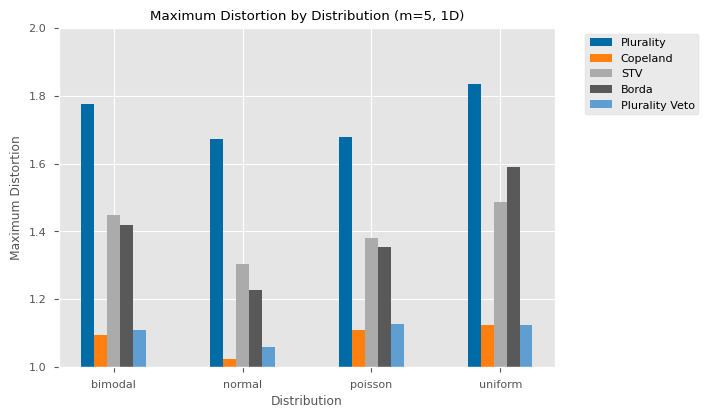

In [353]:
# Extract the data
distribution = group_by_distribution_m5.index
plurality_max = group_by_distribution_m5["Plurality_Distortion_max"]
copeland_max = group_by_distribution_m5["Copeland_Distortion_max"]
stv_max = group_by_distribution_m5["STV_Distortion_max"]
borda_max = group_by_distribution_m5["Borda_Distortion_max"]
# star_max = group_by_distribution_m5["STAR_Distortion_max"]
pluralityVeto_max = group_by_distribution_m5["PluralityVeto_Distortion_max"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_max, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_max, width=bar_width, label="Copeland")
plt.bar(x, stv_max, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_max, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_max, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_max, width=bar_width, label="Plurality Veto")

# Customize the plot

plt.xlabel("Distribution")
plt.ylabel("Maximum Distortion")
plt.title("Maximum Distortion by Distribution (m=5, 1D)")
plt.xticks(x, distribution)
plt.ylim(1,2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()



Observation: Plurality stands out with the highest worst-case distortion, notably exceeding that of other voting mechanisms, especially in cases where the distribution is normal. Among all four mechanisms, Copeland and STAR consistently perform well, demonstrating low worst-case distortion.

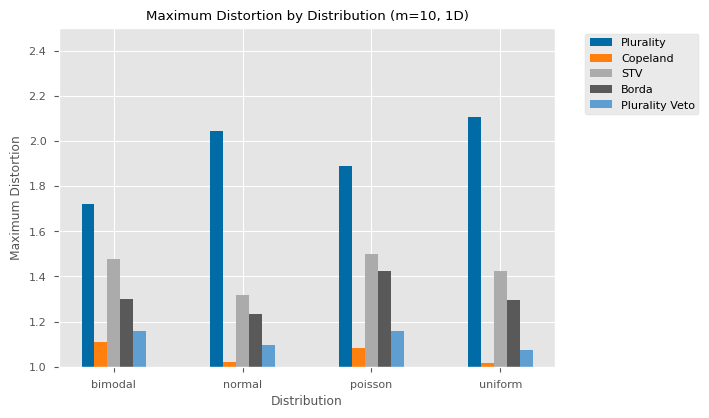

In [354]:
distribution = group_by_distribution_m10.index
plurality_max = group_by_distribution_m10["Plurality_Distortion_max"]
copeland_max = group_by_distribution_m10["Copeland_Distortion_max"]
stv_max = group_by_distribution_m10["STV_Distortion_max"]
borda_max = group_by_distribution_m10["Borda_Distortion_max"]
# star_max = group_by_distribution_m5["STAR_Distortion_max"]
pluralityVeto_max = group_by_distribution_m10["PluralityVeto_Distortion_max"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_max, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_max, width=bar_width, label="Copeland")
plt.bar(x, stv_max, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_max, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_max, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_max, width=bar_width, label="Plurality Veto")

# Customize the plot

plt.xlabel("Distribution")
plt.ylabel("Maximum Distortion")
plt.title("Maximum Distortion by Distribution (m=10, 1D)")
plt.xticks(x, distribution)
plt.ylim(1,2.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

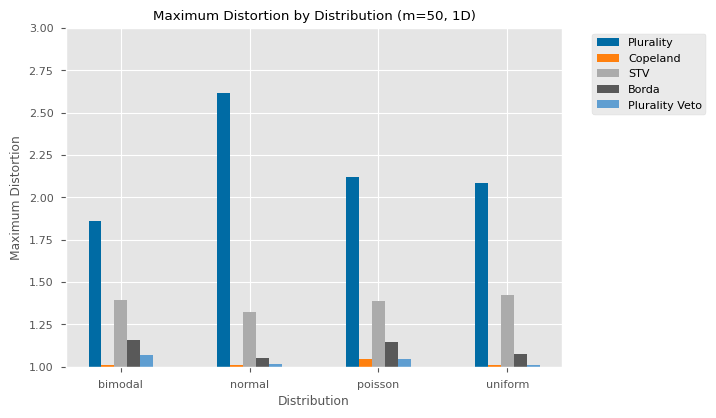

In [355]:
distribution = group_by_distribution_m50.index
plurality_max = group_by_distribution_m50["Plurality_Distortion_max"]
copeland_max = group_by_distribution_m50["Copeland_Distortion_max"]
stv_max = group_by_distribution_m50["STV_Distortion_max"]
borda_max = group_by_distribution_m50["Borda_Distortion_max"]
# star_max = group_by_distribution_m5["STAR_Distortion_max"]
pluralityVeto_max = group_by_distribution_m50["PluralityVeto_Distortion_max"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_max, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_max, width=bar_width, label="Copeland")
plt.bar(x, stv_max, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_max, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_max, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_max, width=bar_width, label="Plurality Veto")

# Customize the plot

plt.xlabel("Distribution")
plt.ylabel("Maximum Distortion")
plt.title("Maximum Distortion by Distribution (m=50, 1D)")
plt.xticks(x, distribution)
plt.ylim(1,3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

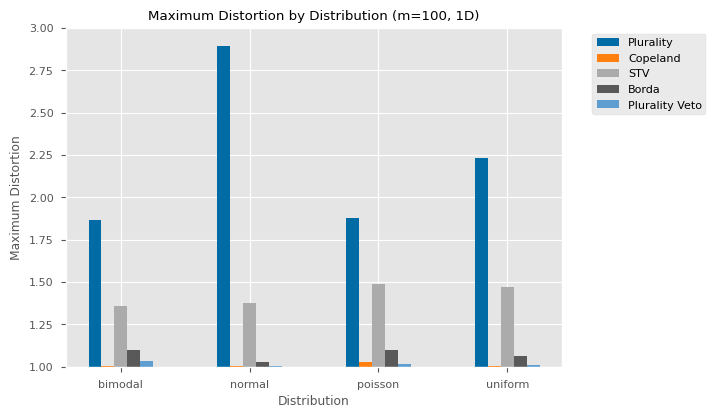

In [372]:
distribution = group_by_distribution_m100.index
plurality_max = group_by_distribution_m100["Plurality_Distortion_max"]
copeland_max = group_by_distribution_m100["Copeland_Distortion_max"]
stv_max = group_by_distribution_m100["STV_Distortion_max"]
borda_max = group_by_distribution_m100["Borda_Distortion_max"]
# star_max = group_by_distribution_m5["STAR_Distortion_max"]
pluralityVeto_max = group_by_distribution_m100["PluralityVeto_Distortion_max"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_max, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_max, width=bar_width, label="Copeland")
plt.bar(x, stv_max, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_max, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_max, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_max, width=bar_width, label="Plurality Veto")

# Customize the plot

plt.xlabel("Distribution")
plt.ylabel("Maximum Distortion")
plt.title("Maximum Distortion by Distribution (m=100, 1D)")
plt.xticks(x, distribution)
plt.ylim(1,3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

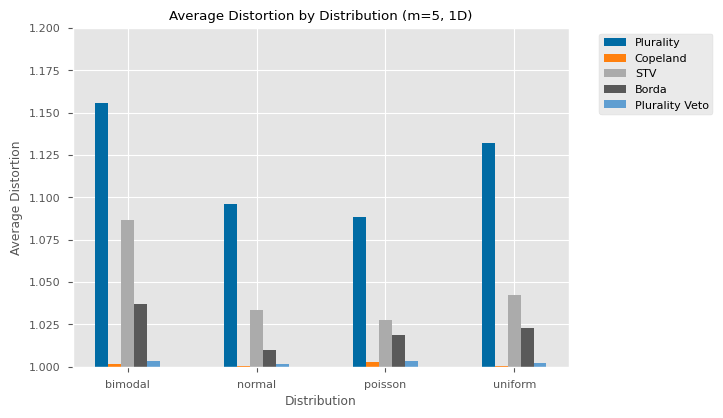

In [373]:

# Extract the data
distribution = group_by_distribution_m5.index
plurality_avg = group_by_distribution_m5["Plurality_Distortion_avg"]
copeland_avg = group_by_distribution_m5["Copeland_Distortion_avg"]
stv_avg = group_by_distribution_m5["STV_Distortion_avg"]
borda_avg = group_by_distribution_m5["Borda_Distortion_avg"]
# star_avg = group_by_distribution_m5["STAR_Distortion_avg"]
pluralityVeto_avg = group_by_distribution_m5["PluralityVeto_Distortion_avg"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_avg, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_avg, width=bar_width, label="Copeland")
plt.bar(x, stv_avg, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_avg, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_avg, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_avg, width=bar_width, label="Plurality Veto")

# Customize the plot

plt.xlabel("Distribution")
plt.ylabel("Average Distortion")
plt.title("Average Distortion by Distribution (m=5, 1D)")
plt.xticks(x, distribution)
plt.ylim(1,1.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

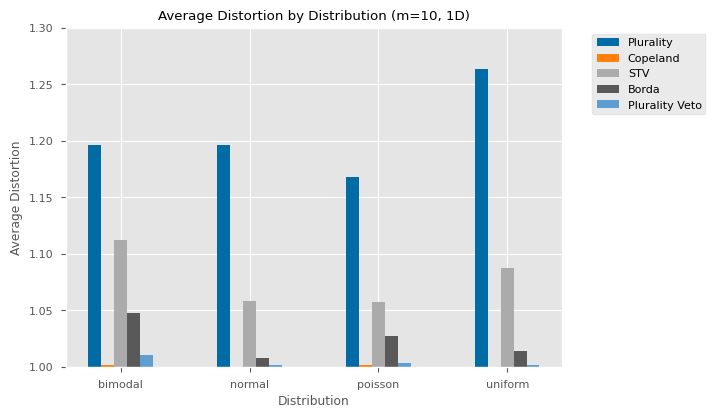

In [358]:
# Extract the data
distribution = group_by_distribution_m10.index
plurality_avg = group_by_distribution_m10["Plurality_Distortion_avg"]
copeland_avg = group_by_distribution_m10["Copeland_Distortion_avg"]
stv_avg = group_by_distribution_m10["STV_Distortion_avg"]
borda_avg = group_by_distribution_m10["Borda_Distortion_avg"]
# star_avg = group_by_distribution_m5["STAR_Distortion_avg"]
pluralityVeto_avg = group_by_distribution_m10["PluralityVeto_Distortion_avg"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_avg, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_avg, width=bar_width, label="Copeland")
plt.bar(x, stv_avg, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_avg, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_avg, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_avg, width=bar_width, label="Plurality Veto")

# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Average Distortion")
plt.title("Average Distortion by Distribution (m=10, 1D)")
plt.xticks(x, distribution)
plt.ylim(1,1.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

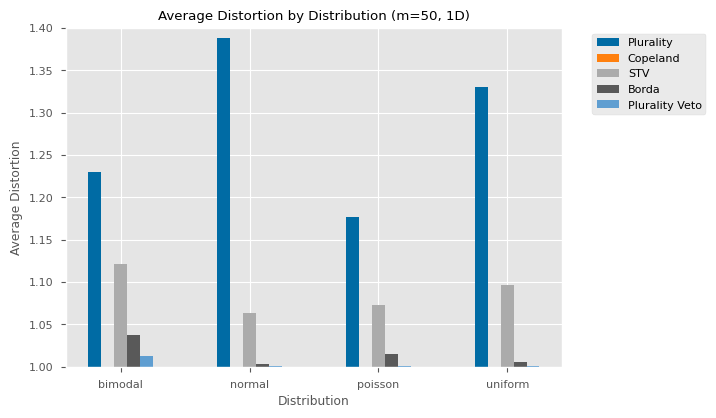

In [359]:
# Extract the data
distribution = group_by_distribution_m50.index
plurality_avg = group_by_distribution_m50["Plurality_Distortion_avg"]
copeland_avg = group_by_distribution_m50["Copeland_Distortion_avg"]
stv_avg = group_by_distribution_m50["STV_Distortion_avg"]
borda_avg = group_by_distribution_m50["Borda_Distortion_avg"]
# star_avg = group_by_distribution_m5["STAR_Distortion_avg"]
pluralityVeto_avg = group_by_distribution_m50["PluralityVeto_Distortion_avg"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_avg, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_avg, width=bar_width, label="Copeland")
plt.bar(x, stv_avg, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_avg, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_avg, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_avg, width=bar_width, label="Plurality Veto")

# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Average Distortion")
plt.title("Average Distortion by Distribution (m=50, 1D)")
plt.xticks(x, distribution)
plt.ylim(1,1.4)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

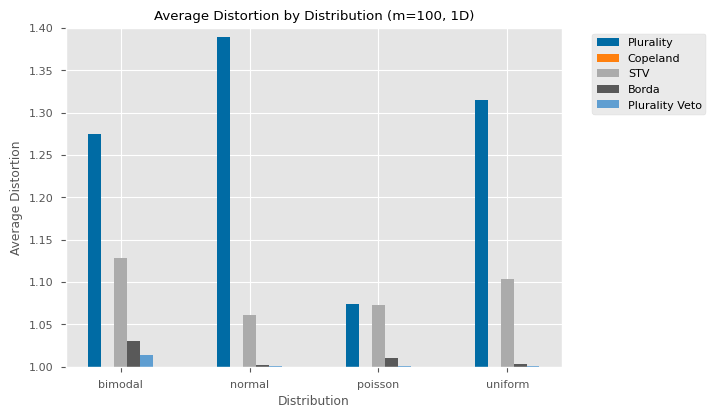

In [360]:
# Extract the data

distribution = group_by_distribution_m100.index
plurality_avg = group_by_distribution_m100["Plurality_Distortion_avg"]
copeland_avg = group_by_distribution_m100["Copeland_Distortion_avg"]
stv_avg = group_by_distribution_m100["STV_Distortion_avg"]
borda_avg = group_by_distribution_m100["Borda_Distortion_avg"]
# star_avg = group_by_distribution_m5["STAR_Distortion_avg"]
pluralityVeto_avg = group_by_distribution_m100["PluralityVeto_Distortion_avg"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_avg, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_avg, width=bar_width, label="Copeland")
plt.bar(x, stv_avg, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_avg, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_avg, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_avg, width=bar_width, label="Plurality Veto")

# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Average Distortion")
plt.title("Average Distortion by Distribution (m=100, 1D)")
plt.xticks(x, distribution)
plt.ylim(1,1.4)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Plurality consistently has the highest average distortion, though the difference is less significant than in worst-case distortion.

The other four mechanisms exhibit relatively similar average case distortion without notable differences.

In [361]:
# group_by_m = df.groupby("m").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))
group_by_m_normal = df.loc[df['Distribution'] == "normal"].groupby("m").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()
group_by_m_uniform = df.loc[df['Distribution'] == "uniform"].groupby('m').agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()
group_by_m_poisson = df.loc[df['Distribution'] == "poisson"].groupby('m').agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()
group_by_m_bimodal = df.loc[df['Distribution'] == "bimodal"].groupby('m').agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()


In [346]:
group_by_m_n_normal.m

0      5
1     10
2     50
3    100
Name: m, dtype: int64

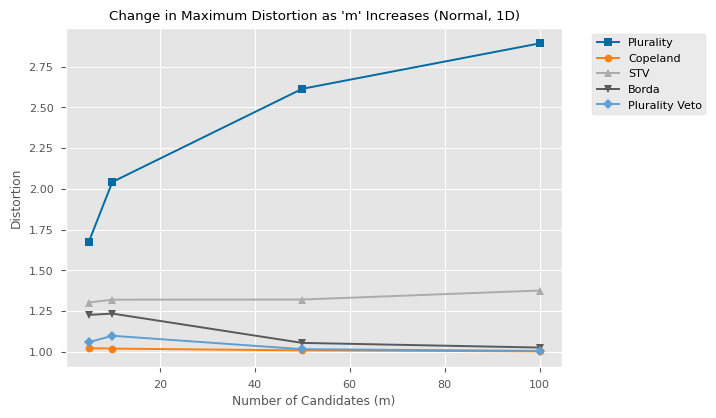

In [387]:
#color palatte for the colorblind
CB_color_cycle = ['#006BA4', '#FF800E', '#ABABAB', '#595959',
                 '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']
styles1 = ['s-','o-','^-', 'v-','D-']


plt.plot(group_by_m_normal.m, group_by_m_normal["Plurality_Distortion_max"], styles1[0], label="Plurality", color = CB_color_cycle[0])
plt.plot(group_by_m_normal.m, group_by_m_normal["Copeland_Distortion_max"], styles1[1], label="Copeland",  color = CB_color_cycle[1])
plt.plot(group_by_m_normal.m, group_by_m_normal["STV_Distortion_max"], styles1[2], label="STV", color = CB_color_cycle[2])
plt.plot(group_by_m_normal.m, group_by_m_normal["Borda_Distortion_max"], styles1[3], label="Borda", color = CB_color_cycle[3])
plt.plot(group_by_m_normal.m, group_by_m_normal["PluralityVeto_Distortion_max"], styles1[4], label="Plurality Veto", color = CB_color_cycle[4])

# Customize the plot
plt.xlabel("Number of Candidates (m)")
plt.ylabel("Distortion")
plt.title("Change in Maximum Distortion as 'm' Increases (Normal, 1D)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()

Plurality consistently exhibits the highest worst-case distortion, with a notable increase as the number of candidates (m) rises.
In contrast, the other mechanisms show relatively stable worst-case distortion regardless of m.
Notably, Copeland consistently demonstrates the lowest worst-case distortion among all methods.

In [344]:
group_by_m_uniform

,m,Plurality_Distortion_avg,Plurality_Distortion_max,Copeland_Distortion_avg,Copeland_Distortion_max,STV_Distortion_avg,STV_Distortion_max,Borda_Distortion_avg,Borda_Distortion_max,STAR_Distortion_avg,STAR_Distortion_max,PluralityVeto_Distortion_avg,PluralityVeto_Distortion_max
0,5,1.131936,1.834475,1.000560,1.124691,1.042177,1.485907,1.023067,1.590971,1.003831,1.124691,1.002205,1.124691
1,10,1.263442,2.107611,1.000185,1.015795,1.087172,1.424992,1.013891,1.296826,1.003973,1.092519,1.001387,1.074823
2,50,1.330389,2.087743,1.000109,1.011514,1.096534,1.423290,1.005272,1.072679,1.004361,1.034909,1.000665,1.012217
3,100,1.314563,2.233373,1.000066,1.004105,1.103176,1.470947,1.003431,1.064043,1.004099,1.035642,1.000662,1.008971


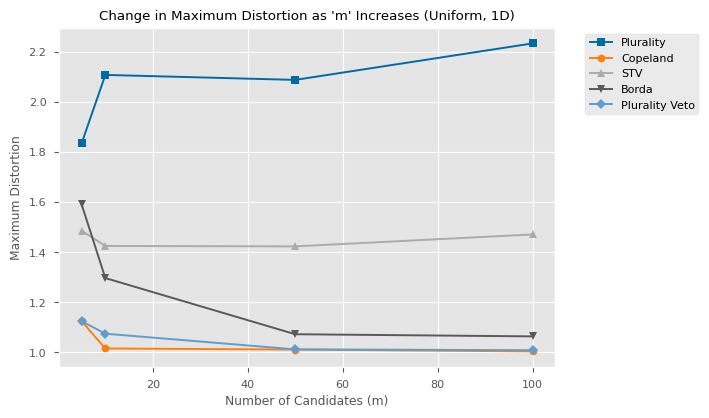

In [380]:
plt.plot(group_by_m_uniform.m, group_by_m_uniform["Plurality_Distortion_max"],styles1[0], label="Plurality")
plt.plot(group_by_m_uniform.m, group_by_m_uniform["Copeland_Distortion_max"], styles1[1], label="Copeland")
plt.plot(group_by_m_uniform.m, group_by_m_uniform["STV_Distortion_max"], styles1[2], label="STV")
plt.plot(group_by_m_uniform.m, group_by_m_uniform["Borda_Distortion_max"], styles1[3], label="Borda")
plt.plot(group_by_m_uniform.m, group_by_m_uniform["PluralityVeto_Distortion_max"], styles1[4], label="Plurality Veto")

# Customize the plot
plt.xlabel("Number of Candidates (m)")
plt.ylabel("Maximum Distortion")
plt.title("Change in Maximum Distortion as 'm' Increases (Uniform, 1D)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()


# Show the plot
plt.show()

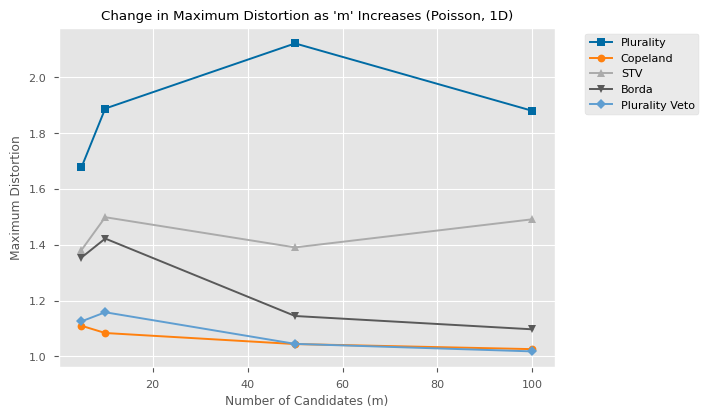

In [381]:
plt.plot(group_by_m_poisson.m, group_by_m_poisson["Plurality_Distortion_max"],styles1[0], label="Plurality")
plt.plot(group_by_m_poisson.m, group_by_m_poisson["Copeland_Distortion_max"], styles1[1], label="Copeland")
plt.plot(group_by_m_poisson.m, group_by_m_poisson["STV_Distortion_max"], styles1[2], label="STV")
plt.plot(group_by_m_poisson.m, group_by_m_poisson["Borda_Distortion_max"], styles1[3], label="Borda")
plt.plot(group_by_m_poisson.m, group_by_m_poisson["PluralityVeto_Distortion_max"], styles1[4], label="Plurality Veto")

# Customize the plot
plt.xlabel("Number of Candidates (m)")
plt.ylabel("Maximum Distortion")
plt.title("Change in Maximum Distortion as 'm' Increases (Poisson, 1D)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()

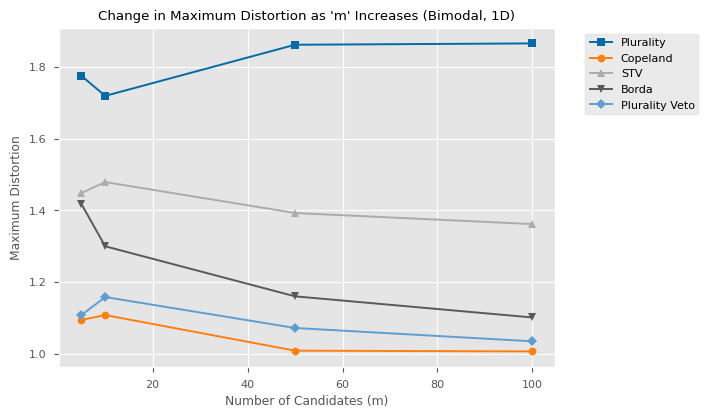

In [382]:

plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Plurality_Distortion_max"],styles1[0], label="Plurality")
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Copeland_Distortion_max"], styles1[1], label="Copeland")
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["STV_Distortion_max"], styles1[2], label="STV")
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Borda_Distortion_max"], styles1[3], label="Borda")
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["PluralityVeto_Distortion_max"], styles1[4], label="Plurality Veto")

# Customize the plot
plt.xlabel("Number of Candidates (m)")
plt.ylabel("Maximum Distortion")
plt.title("Change in Maximum Distortion as 'm' Increases (Bimodal, 1D)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()

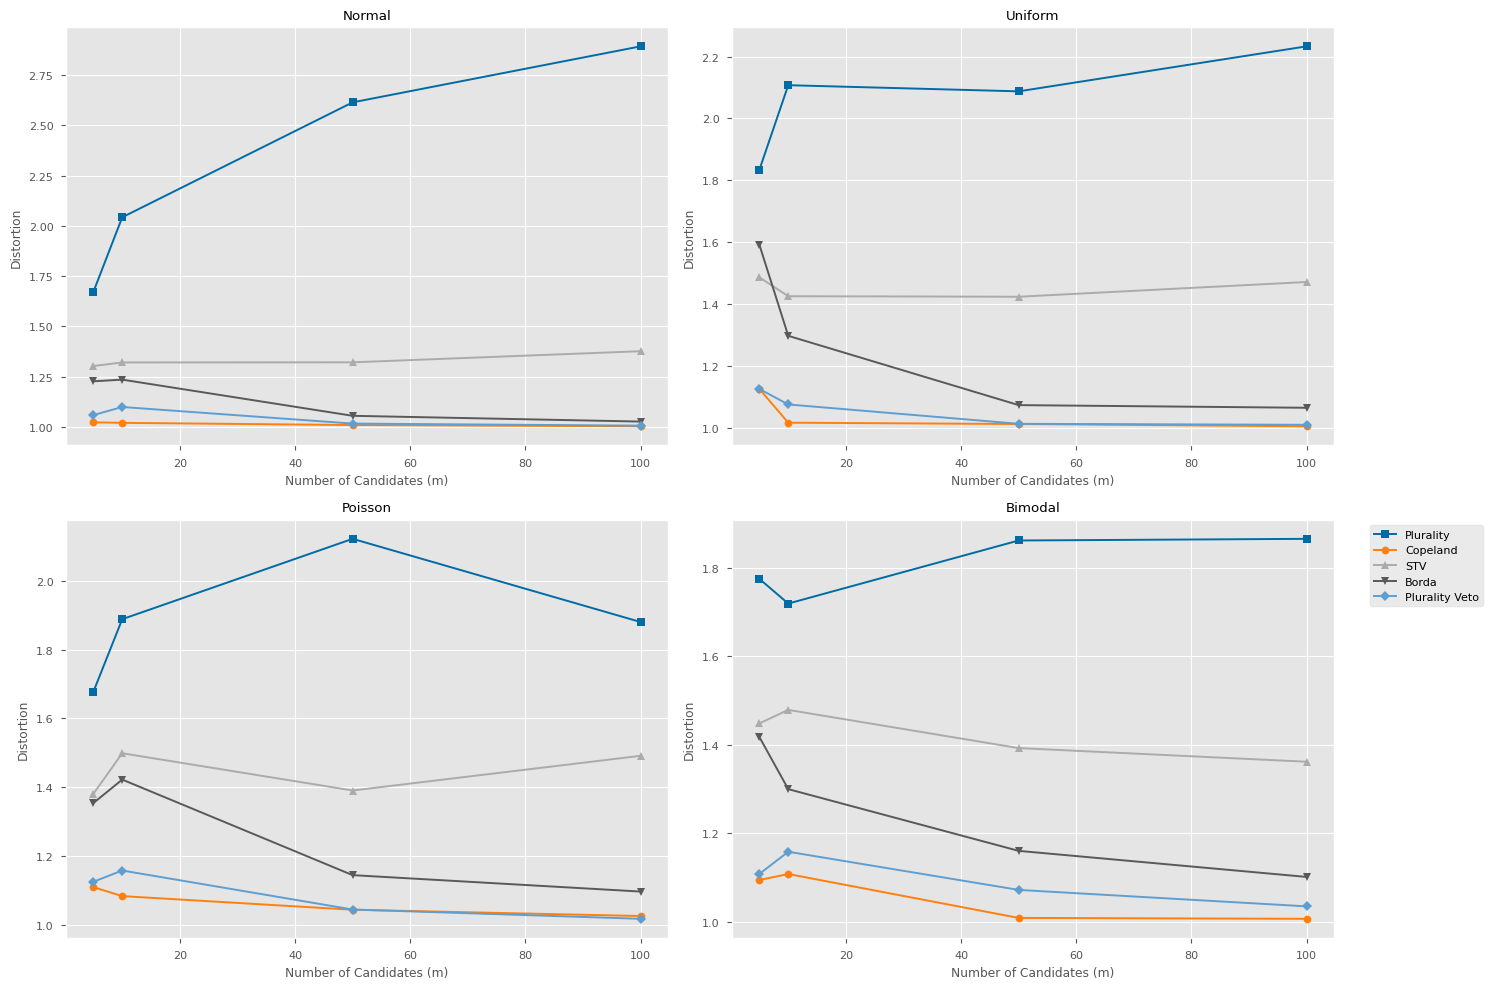

In [441]:
distributions = ["Normal", "Uniform", "Poisson", "Bimodal"]

plt.figure(figsize=(15,10))
for i, distribution in enumerate(distributions, 1):
    plt.subplot(2, 2, i)  # Create a subplot for each mechanism

    if distribution == 'Bimodal':
        plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Plurality_Distortion_max"],styles1[0], label="Plurality")
        plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Copeland_Distortion_max"], styles1[1], label="Copeland")
        plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["STV_Distortion_max"], styles1[2], label="STV")
        plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Borda_Distortion_max"], styles1[3], label="Borda")
        plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["PluralityVeto_Distortion_max"], styles1[4], label="Plurality Veto")

    elif distribution == 'Normal':
        plt.plot(group_by_m_normal.m, group_by_m_normal["Plurality_Distortion_max"], styles1[0], label="Plurality", color = CB_color_cycle[0])
        plt.plot(group_by_m_normal.m, group_by_m_normal["Copeland_Distortion_max"], styles1[1], label="Copeland",  color = CB_color_cycle[1])
        plt.plot(group_by_m_normal.m, group_by_m_normal["STV_Distortion_max"], styles1[2], label="STV", color = CB_color_cycle[2])
        plt.plot(group_by_m_normal.m, group_by_m_normal["Borda_Distortion_max"], styles1[3], label="Borda", color = CB_color_cycle[3])
        plt.plot(group_by_m_normal.m, group_by_m_normal["PluralityVeto_Distortion_max"], styles1[4], label="Plurality Veto", color = CB_color_cycle[4])

    elif distribution == 'Poisson':
        plt.plot(group_by_m_poisson.m, group_by_m_poisson["Plurality_Distortion_max"], styles1[0], label="Plurality", color = CB_color_cycle[0])
        plt.plot(group_by_m_poisson.m, group_by_m_poisson["Copeland_Distortion_max"], styles1[1], label="Copeland",  color = CB_color_cycle[1])
        plt.plot(group_by_m_poisson.m, group_by_m_poisson["STV_Distortion_max"], styles1[2], label="STV", color = CB_color_cycle[2])
        plt.plot(group_by_m_poisson.m, group_by_m_poisson["Borda_Distortion_max"], styles1[3], label="Borda", color = CB_color_cycle[3])
        plt.plot(group_by_m_poisson.m, group_by_m_poisson["PluralityVeto_Distortion_max"], styles1[4], label="Plurality Veto", color = CB_color_cycle[4])

    elif distribution == 'Uniform':
        plt.plot(group_by_m_uniform.m, group_by_m_uniform["Plurality_Distortion_max"], styles1[0], label="Plurality", color = CB_color_cycle[0])
        plt.plot(group_by_m_uniform.m, group_by_m_uniform["Copeland_Distortion_max"], styles1[1], label="Copeland",  color = CB_color_cycle[1])
        plt.plot(group_by_m_uniform.m, group_by_m_uniform["STV_Distortion_max"], styles1[2], label="STV", color = CB_color_cycle[2])
        plt.plot(group_by_m_uniform.m, group_by_m_uniform["Borda_Distortion_max"], styles1[3], label="Borda", color = CB_color_cycle[3])
        plt.plot(group_by_m_uniform.m, group_by_m_uniform["PluralityVeto_Distortion_max"], styles1[4], label="Plurality Veto", color = CB_color_cycle[4])


    plt.title(f'{distribution}')
    plt.xlabel("Number of Candidates (m)")
    plt.ylabel("Distortion")


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

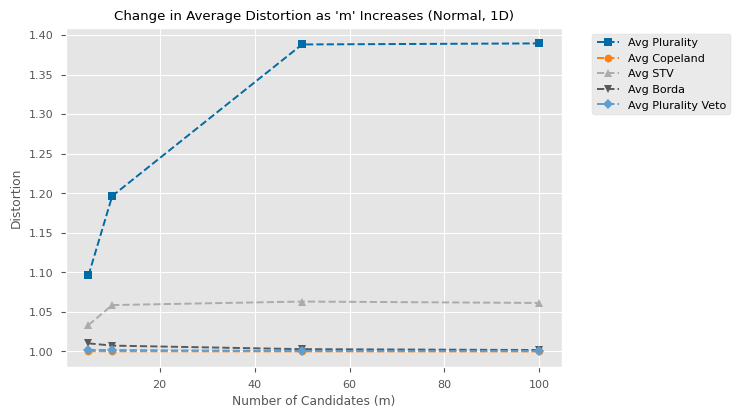

In [388]:
styles2 = ['s--','o--','^--', 'v--','D--']

plt.plot(group_by_m_normal.m, group_by_m_normal["Plurality_Distortion_avg"], styles2[0], label="Avg Plurality", color = CB_color_cycle[0])
plt.plot(group_by_m_normal.m, group_by_m_normal["Copeland_Distortion_avg"], styles2[1], label="Avg Copeland", color = CB_color_cycle[1])
plt.plot(group_by_m_normal.m, group_by_m_normal["STV_Distortion_avg"], styles2[2], label="Avg STV", color = CB_color_cycle[2])
plt.plot(group_by_m_normal.m, group_by_m_normal["Borda_Distortion_avg"], styles2[3], label="Avg Borda", color = CB_color_cycle[3])
plt.plot(group_by_m_normal.m, group_by_m_normal["PluralityVeto_Distortion_avg"], styles2[4], label="Avg Plurality Veto", color = CB_color_cycle[4])


# Customize the plot
plt.xlabel("Number of Candidates (m)")
plt.ylabel("Distortion")
plt.title("Change in Average Distortion as 'm' Increases (Normal, 1D)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()

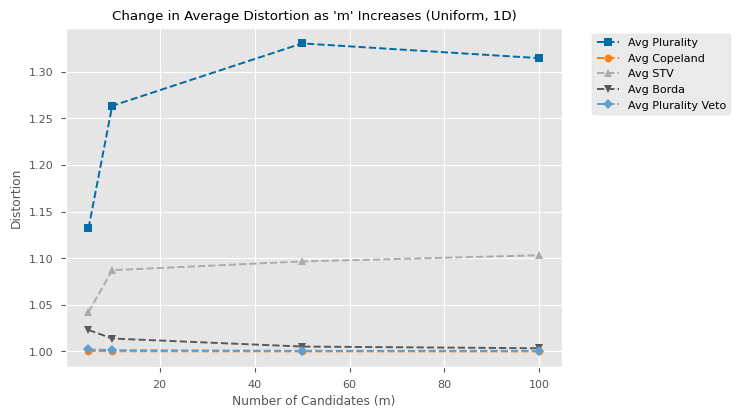

In [389]:
styles2 = ['s--','o--','^--', 'v--','D--']

plt.plot(group_by_m_uniform.m, group_by_m_uniform["Plurality_Distortion_avg"], styles2[0], label="Avg Plurality", color = CB_color_cycle[0])
plt.plot(group_by_m_uniform.m, group_by_m_uniform["Copeland_Distortion_avg"], styles2[1], label="Avg Copeland", color = CB_color_cycle[1])
plt.plot(group_by_m_uniform.m, group_by_m_uniform["STV_Distortion_avg"], styles2[2], label="Avg STV", color = CB_color_cycle[2])
plt.plot(group_by_m_uniform.m, group_by_m_uniform["Borda_Distortion_avg"], styles2[3], label="Avg Borda", color = CB_color_cycle[3])
plt.plot(group_by_m_uniform.m, group_by_m_uniform["PluralityVeto_Distortion_avg"], styles2[4], label="Avg Plurality Veto", color = CB_color_cycle[4])


# Customize the plot
plt.xlabel("Number of Candidates (m)")
plt.ylabel("Distortion")
plt.title("Change in Average Distortion as 'm' Increases (Uniform, 1D)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()

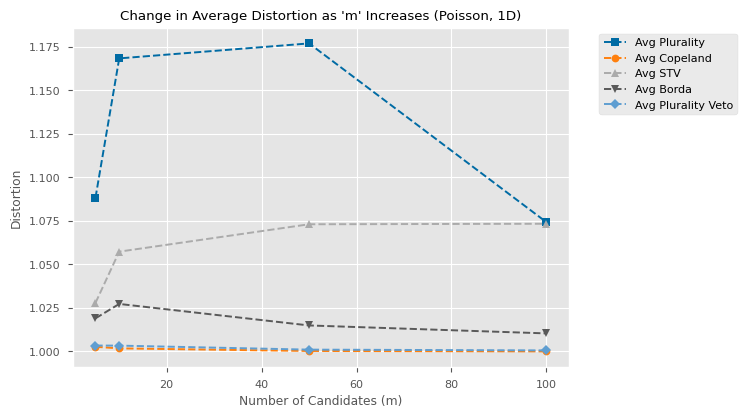

In [391]:
plt.plot(group_by_m_poisson.m, group_by_m_poisson["Plurality_Distortion_avg"], styles2[0], label="Avg Plurality", color = CB_color_cycle[0])
plt.plot(group_by_m_poisson.m, group_by_m_poisson["Copeland_Distortion_avg"], styles2[1], label="Avg Copeland", color = CB_color_cycle[1])
plt.plot(group_by_m_poisson.m, group_by_m_poisson["STV_Distortion_avg"], styles2[2], label="Avg STV", color = CB_color_cycle[2])
plt.plot(group_by_m_poisson.m, group_by_m_poisson["Borda_Distortion_avg"], styles2[3], label="Avg Borda", color = CB_color_cycle[3])
plt.plot(group_by_m_poisson.m, group_by_m_poisson["PluralityVeto_Distortion_avg"], styles2[4], label="Avg Plurality Veto", color = CB_color_cycle[4])


# Customize the plot
plt.xlabel("Number of Candidates (m)")
plt.ylabel("Distortion")
plt.title("Change in Average Distortion as 'm' Increases (Poisson, 1D)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()

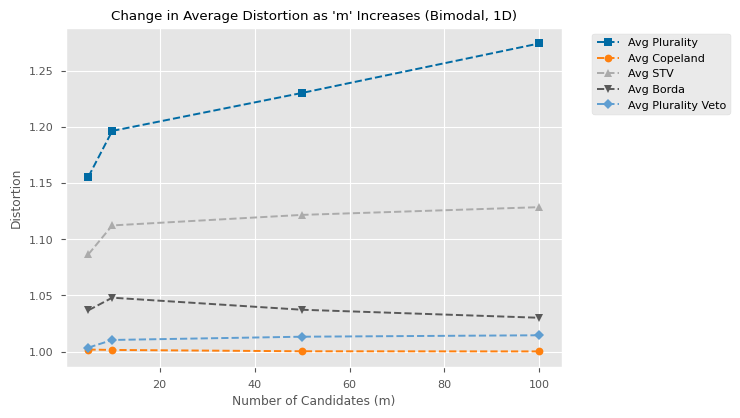

In [393]:
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Plurality_Distortion_avg"], styles2[0], label="Avg Plurality", color = CB_color_cycle[0])
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Copeland_Distortion_avg"], styles2[1], label="Avg Copeland", color = CB_color_cycle[1])
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["STV_Distortion_avg"], styles2[2], label="Avg STV", color = CB_color_cycle[2])
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Borda_Distortion_avg"], styles2[3], label="Avg Borda", color = CB_color_cycle[3])
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["PluralityVeto_Distortion_avg"], styles2[4], label="Avg Plurality Veto", color = CB_color_cycle[4])


# Customize the plot
plt.xlabel("Number of Candidates (m)")
plt.ylabel("Distortion")
plt.title("Change in Average Distortion as 'm' Increases (Bimodal, 1D)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()

In [274]:
# group_by_n = df.groupby("n").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"))
# group_by_n

In [275]:
# plt.plot(group_by_n.index, group_by_n["Plurality_Distortion_max"], label="Plurality")
# plt.plot(group_by_n.index, group_by_n["Copeland_Distortion_max"], label="Copeland")
# plt.plot(group_by_n.index, group_by_n["STV_Distortion_max"], label="STV")
# plt.plot(group_by_n.index, group_by_n["Borda_Distortion_max"], label="Borda")
# plt.plot(group_by_n.index, group_by_n["STAR_Distortion_max"], label="STAR")

# # Customize the plot
# plt.xlabel("Number of Voters (n)")
# plt.ylabel("Maximum Distortion")
# plt.title("Change in Maximum Distortion as 'n' Increases")
# plt.legend()


# # Show the plot
# plt.show()

In [383]:
# Define the target value
target_value = 1

# Group by 'Distribution' and calculate the percentage of each methods choosing the OPT
accuracy_by_distribution_m5 = df.loc[df['m'] == 5].groupby('Distribution').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

).reset_index()

accuracy_by_distribution_m10 = df.loc[df['m'] == 10].groupby('Distribution').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

).reset_index()

accuracy_by_distribution_m50 = df.loc[df['m'] == 50].groupby('Distribution').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

).reset_index()

accuracy_by_distribution_m100 = df.loc[df['m'] == 100].groupby('Distribution').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

).reset_index()

In [328]:
accuracy_by_distribution_m5

,Distribution,Plurality_percentage,Copeland_percentage,STV_percentage,STAR_percentage,Borda_percentage,PluralityVeto_percentage
0,bimodal,9.6,92.0,19.6,86.6,61.8,86.0
1,normal,40.8,96.0,56.0,78.4,82.0,88.4
2,poisson,51.6,92.6,68.0,70.4,75.2,89.0
3,uniform,39.0,96.4,57.8,84.0,76.2,88.8


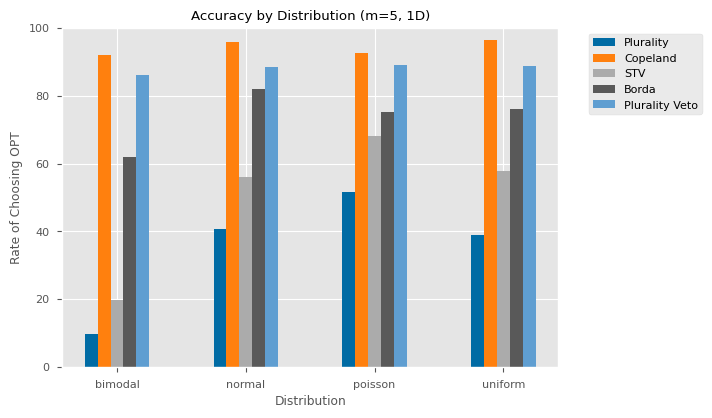

In [407]:
# Extract the data
distribution = accuracy_by_distribution_m5["Distribution"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, accuracy_by_distribution_m5["Plurality_percentage"], width=bar_width, label="Plurality")
plt.bar(x - bar_width, accuracy_by_distribution_m5["Copeland_percentage"], width=bar_width, label="Copeland")
plt.bar(x, accuracy_by_distribution_m5["STV_percentage"], width=bar_width, label="STV")
plt.bar(x + bar_width, accuracy_by_distribution_m5["Borda_percentage"], width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, accuracy_by_distribution_m5["STAR_percentage"], width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, accuracy_by_distribution_m5["PluralityVeto_percentage"], width=bar_width, label="Plurality Veto")


# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Rate of Choosing OPT")
plt.title("Accuracy by Distribution (m=5, 1D)")
plt.xticks(x, distribution)
plt.ylim(0,100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


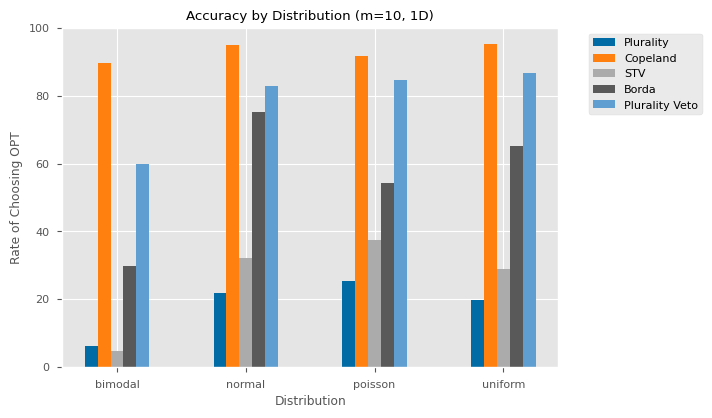

In [404]:
# Extract the data
distribution = accuracy_by_distribution_m10["Distribution"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, accuracy_by_distribution_m10["Plurality_percentage"], width=bar_width, label="Plurality")
plt.bar(x - bar_width, accuracy_by_distribution_m10["Copeland_percentage"], width=bar_width, label="Copeland")
plt.bar(x, accuracy_by_distribution_m10["STV_percentage"], width=bar_width, label="STV")
plt.bar(x + bar_width, accuracy_by_distribution_m10["Borda_percentage"], width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, accuracy_by_distribution_m10["STAR_percentage"], width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, accuracy_by_distribution_m10["PluralityVeto_percentage"], width=bar_width, label="Plurality Veto")


# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Rate of Choosing OPT")
plt.title("Accuracy by Distribution (m=10, 1D)")
plt.xticks(x, distribution)
plt.ylim(0,100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

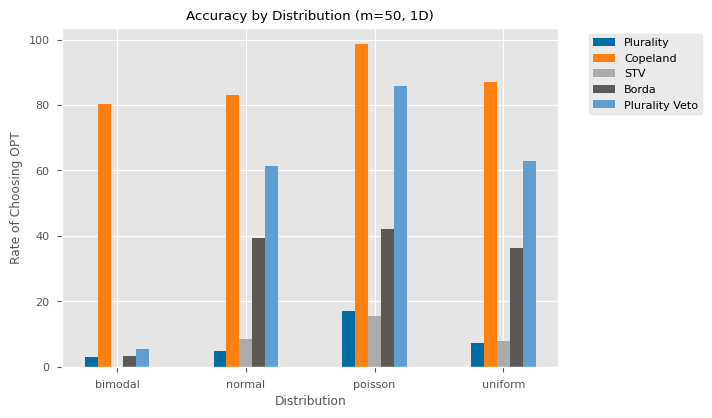

In [397]:
# Extract the data
distribution = accuracy_by_distribution_m50["Distribution"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, accuracy_by_distribution_m50["Plurality_percentage"], width=bar_width, label="Plurality")
plt.bar(x - bar_width, accuracy_by_distribution_m50["Copeland_percentage"], width=bar_width, label="Copeland")
plt.bar(x, accuracy_by_distribution_m50["STV_percentage"], width=bar_width, label="STV")
plt.bar(x + bar_width, accuracy_by_distribution_m50["Borda_percentage"], width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, accuracy_by_distribution_m10["STAR_percentage"], width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, accuracy_by_distribution_m50["PluralityVeto_percentage"], width=bar_width, label="Plurality Veto")


# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Rate of Choosing OPT")
plt.title("Accuracy by Distribution (m=50, 1D)")
plt.xticks(x, distribution)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

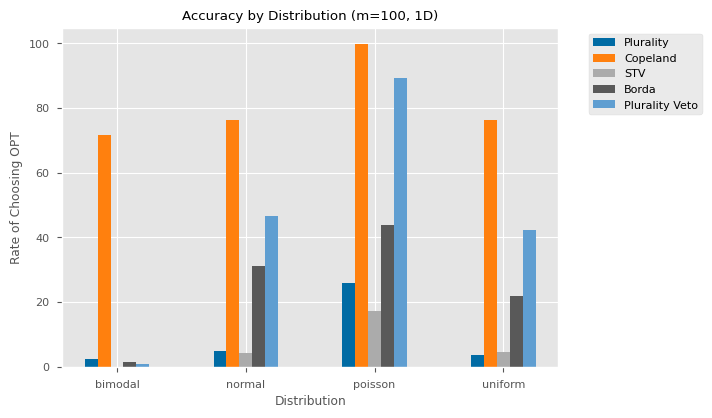

In [408]:
# Extract the data
distribution = accuracy_by_distribution_m100["Distribution"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, accuracy_by_distribution_m100["Plurality_percentage"], width=bar_width, label="Plurality")
plt.bar(x - bar_width, accuracy_by_distribution_m100["Copeland_percentage"], width=bar_width, label="Copeland")
plt.bar(x, accuracy_by_distribution_m100["STV_percentage"], width=bar_width, label="STV")
plt.bar(x + bar_width, accuracy_by_distribution_m100["Borda_percentage"], width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, accuracy_by_distribution_m10["STAR_percentage"], width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, accuracy_by_distribution_m100["PluralityVeto_percentage"], width=bar_width, label="Plurality Veto")


# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Rate of Choosing OPT")
plt.title("Accuracy by Distribution (m=100, 1D)")
plt.xticks(x, distribution)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

While the differences in distortion are not substantial, Copeland outperforms other methods in terms of accurately selecting the OPT, achieving an accuracy rate of approximately 70-80%.
In contrast, Plurality exhibits the lowest accuracy, with only about 10-30% accuracy in selecting the OPT.

In [442]:
# Define the target value
target_value = 1

# Group by 'm' and calculate the percentage of each methods choosing the OPT
accuracy_by_m_normal = df.loc[df['Distribution'] == 'normal'].groupby('m').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

)

accuracy_by_m_uniform = df.loc[df['Distribution'] == 'uniform'].groupby('m').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

)

accuracy_by_m_poisson = df.loc[df['Distribution'] == 'poisson'].groupby('m').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

)

accuracy_by_m_bimodal = df.loc[df['Distribution'] == 'bimodal'].groupby('m').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

)

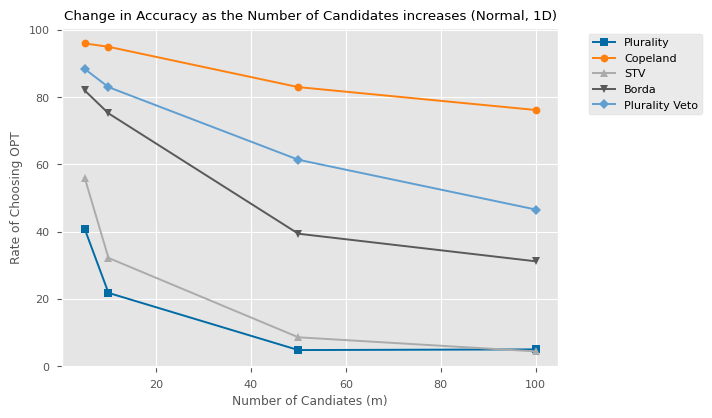

In [446]:
plt.plot(accuracy_by_m_normal.index, accuracy_by_m_normal["Plurality_percentage"], styles1[0], label="Plurality")
plt.plot(accuracy_by_m_normal.index, accuracy_by_m_normal["Copeland_percentage"], styles1[1], label="Copeland")
plt.plot(accuracy_by_m_normal.index, accuracy_by_m_normal["STV_percentage"],styles1[2],  label="STV")
plt.plot(accuracy_by_m_normal.index, accuracy_by_m_normal["Borda_percentage"], styles1[3],label="Borda")
# plt.plot(accuracy_by_m_normal.index, accuracy_by_m_normal["STAR_percentage"], label="STAR")
plt.plot(accuracy_by_m_normal.index, accuracy_by_m_normal["PluralityVeto_percentage"], styles1[4], label="Plurality Veto")

# Customize the plot
plt.xlabel("Number of Candiates (m)")
plt.ylabel("Rate of Choosing OPT")
plt.title("Change in Accuracy as the Number of Candidates increases (Normal, 1D)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

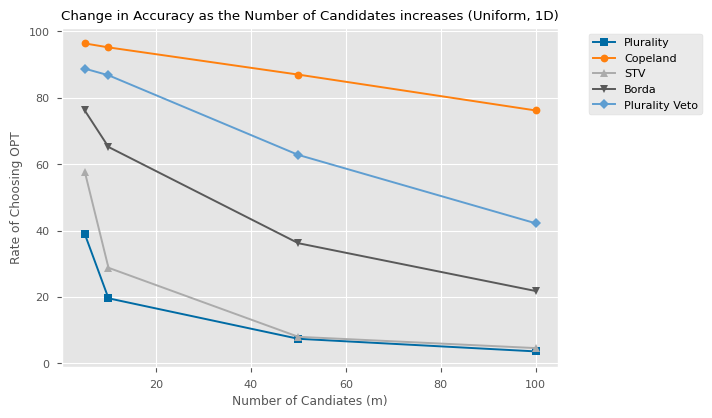

In [448]:
plt.plot(accuracy_by_m_uniform.index, accuracy_by_m_uniform["Plurality_percentage"], styles1[0], label="Plurality")
plt.plot(accuracy_by_m_uniform.index, accuracy_by_m_uniform["Copeland_percentage"], styles1[1], label="Copeland")
plt.plot(accuracy_by_m_uniform.index, accuracy_by_m_uniform["STV_percentage"],styles1[2],  label="STV")
plt.plot(accuracy_by_m_uniform.index, accuracy_by_m_uniform["Borda_percentage"], styles1[3],label="Borda")
# plt.plot(accuracy_by_m_uniform.index, accuracy_by_m_uniform["STAR_percentage"], label="STAR")
plt.plot(accuracy_by_m_uniform.index, accuracy_by_m_uniform["PluralityVeto_percentage"], styles1[4], label="Plurality Veto")

# Customize the plot
plt.xlabel("Number of Candiates (m)")
plt.ylabel("Rate of Choosing OPT")
plt.title("Change in Accuracy as the Number of Candidates increases (Uniform, 1D)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

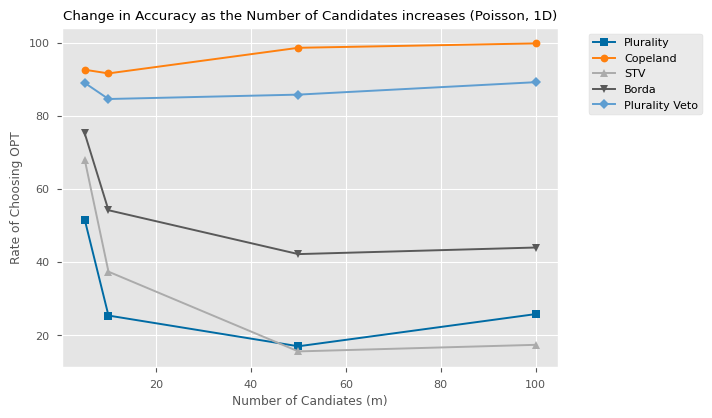

In [451]:
plt.plot(accuracy_by_m_poisson.index, accuracy_by_m_poisson["Plurality_percentage"], styles1[0], label="Plurality")
plt.plot(accuracy_by_m_poisson.index, accuracy_by_m_poisson["Copeland_percentage"], styles1[1], label="Copeland")
plt.plot(accuracy_by_m_poisson.index, accuracy_by_m_poisson["STV_percentage"],styles1[2],  label="STV")
plt.plot(accuracy_by_m_poisson.index, accuracy_by_m_poisson["Borda_percentage"], styles1[3],label="Borda")
# plt.plot(accuracy_by_m_poisson.index, accuracy_by_m_poisson["STAR_percentage"], label="STAR")
plt.plot(accuracy_by_m_poisson.index, accuracy_by_m_poisson["PluralityVeto_percentage"], styles1[4], label="Plurality Veto")

# Customize the plot
plt.xlabel("Number of Candiates (m)")
plt.ylabel("Rate of Choosing OPT")
plt.title("Change in Accuracy as the Number of Candidates increases (Poisson, 1D)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

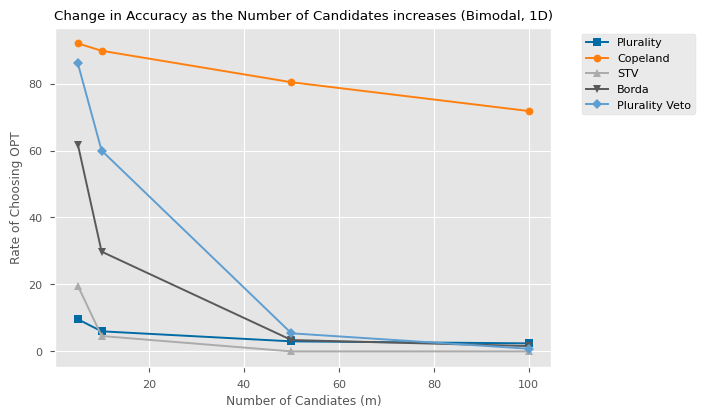

In [452]:
plt.plot(accuracy_by_m_bimodal.index, accuracy_by_m_bimodal["Plurality_percentage"], styles1[0], label="Plurality")
plt.plot(accuracy_by_m_bimodal.index, accuracy_by_m_bimodal["Copeland_percentage"], styles1[1], label="Copeland")
plt.plot(accuracy_by_m_bimodal.index, accuracy_by_m_bimodal["STV_percentage"],styles1[2],  label="STV")
plt.plot(accuracy_by_m_bimodal.index, accuracy_by_m_bimodal["Borda_percentage"], styles1[3],label="Borda")
# plt.plot(accuracy_by_m_bimodal.index, accuracy_by_m_bimodal["STAR_percentage"], label="STAR")
plt.plot(accuracy_by_m_bimodal.index, accuracy_by_m_bimodal["PluralityVeto_percentage"], styles1[4], label="Plurality Veto")

# Customize the plot
plt.xlabel("Number of Candiates (m)")
plt.ylabel("Rate of Choosing OPT")
plt.title("Change in Accuracy as the Number of Candidates increases (Bimodal, 1D)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

Overall, as the number of candidates (m) increases, the accuracy of all mechanisms tends to decrease.
Copeland, however, consistently outperforms other methods even as m increases.